### Importação de Módulos e Arquivos

In [4]:
import pandas as pd

servicosP_df = pd.read_excel('BaseServiçosPrestados.xlsx')
clientes_df =pd.read_csv('CadastroClientes.csv',sep=';',decimal=',')
funcionarios_df = pd.read_csv('CadastroFuncionarios.csv',sep=';',decimal=',')

# Retirar colunas Estado Civil e Cargo da tabela de funcionarios

funcionarios_df = funcionarios_df.drop(['Estado Civil','Cargo'],axis=1)
display(funcionarios_df)

,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo
...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial


In [5]:
display(clientes_df)
display(funcionarios_df)
display(servicosP_df)

,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo
...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


### Valor Total da Folha Salarial

In [6]:
funcionarios_df['Salario Total']=funcionarios_df['Salario Base'] + funcionarios_df['Impostos'] + funcionarios_df['VT'] + funcionarios_df['VR'] + funcionarios_df['Beneficios']
print('O valor total da folha é {:_}'.format(funcionarios_df['Salario Total'].sum()).replace('.',',').replace('_','.'))

O valor total da folha é 2.717.493,22


### Qual foi o faturamento da empresa?

In [7]:
faturamento_df = servicosP_df[['ID Cliente','Tempo Total de Contrato (Meses)']].merge(clientes_df[['ID Cliente','Valor Contrato Mensal']],on='ID Cliente')

In [26]:
display(faturamento_df)

,ID Cliente,Tempo Total de Contrato (Meses),Valor Contrato Mensal,Faturamento Total
0,1,14,540,7560
1,2,12,1260,15120
2,4,14,2520,35280
3,5,8,3510,28080
4,6,8,2340,18720
...,...,...,...,...
232,315,4,1575,6300
233,316,8,3690,29520
234,317,6,2385,14310
235,319,14,4185,58590


In [8]:
faturamento_df['Faturamento Total'] = faturamento_df['Tempo Total de Contrato (Meses)'] * faturamento_df['Valor Contrato Mensal']
print('O faturamento total da empresa foi de R${:_}'.format(faturamento_df['Faturamento Total'].sum()).replace(',','.').replace('_','.'))

O faturamento total da empresa foi de R$5.519.160


#### Qual o % de funcionários que já fechou algum contrato?

In [9]:
qtd_func_fecharam_contrato = len(servicosP_df['ID Funcionário'].unique())
qtd_funcionarios = len(funcionarios_df['ID Funcionário'].unique())
display(qtd_funcionarios)
display(qtd_func_fecharam_contrato)

porc_func_fechou_contrato = qtd_func_fecharam_contrato/qtd_funcionarios

print('A porcentagem de funcionários que fechou algum contrato é {:.2%}'.format(porc_func_fechou_contrato))

114

99

A porcentagem de funcionários que fechou algum contrato é 86.84%


#### Qual o total de contratos que cada área da empresa já fechou?

<AxesSubplot:>

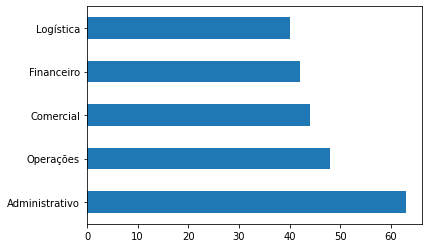

In [23]:
contratos_area = servicosP_df[['ID Funcionário']].merge(funcionarios_df[['ID Funcionário','Area']],on='ID Funcionário')
contratos_area_qtd=contratos_area['Area'].value_counts()
contratos_area_qtd.plot(kind='barh')

#### Qual o total de funcionários por área?

<AxesSubplot:>

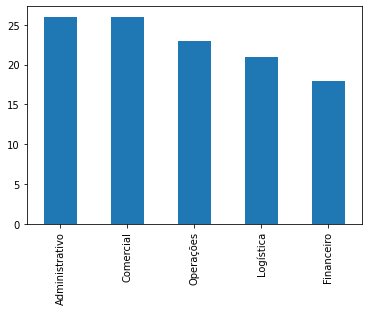

In [18]:
qtd_funcionarios_por_area =funcionarios_df['Area'].value_counts()
qtd_funcionarios_por_area.plot(kind='bar')

#### Qual o ticket médio mensal dos contratos?

In [68]:
print('O valor do Ticket Médio é R${:_.2f}'.format(clientes_df['Valor Contrato Mensal'].mean()).replace('.',',').replace('_','.'))

O valor do Ticket Médio é R$2.502,56


In [77]:
display(contratos_area)

,ID Funcionário,Area,teste,id
0,67,Financeiro,1,0
1,67,Financeiro,2,1
2,67,Financeiro,3,2
3,67,Financeiro,4,3
4,17,Logística,5,4
...,...,...,...,...
232,25,Administrativo,233,232
233,79,Operações,234,233
234,99,Administrativo,235,234
235,14,Financeiro,236,235


In [70]:
display(len(contratos_area))

237

In [74]:
contratos_area['teste'] = contratos_area.index +1

In [88]:
contratos_area['id'] =list(range(len(contratos_area.index)))
display(contratos_area)

,ID Funcionário,Area,teste,id
0,67,Financeiro,1,0
1,67,Financeiro,2,1
2,67,Financeiro,3,2
3,67,Financeiro,4,3
4,17,Logística,5,4
...,...,...,...,...
232,25,Administrativo,233,232
233,79,Operações,234,233
234,99,Administrativo,235,234
235,14,Financeiro,236,235
